# Imports

In [105]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set() # setting seaborn default for plots

## Extract data

### Variable Dictionary 

                               
**survived**: Survived the crash                                                       
**pclass**:   Ticket Class                 *1* = 1st, *2* = 2nd, *3* = 3nd                     
**sex**:      Sex                                                  
**age**:      Age in years                                                          
**sibsp**:    # of siblings/spouses aboard                                                                                     
**parch**:    # of parents/children aboard                                                                                     
**fare**:     Passenger fare                                                                                     
**ticket**:   Ticket number                                                              
**cabin**:    Cabin number                                                               
**alive**:    Alive today                  
**alone**:    Was alone

In [106]:
titanic=pd.DataFrame(sns.load_dataset('titanic'))
titanic.drop(['class','who', 'deck','embark_town','alive','embarked'],axis=1,inplace=True)

# Casting and formatting

titanic['sex']=titanic['sex'].apply(lambda x: 1 if (x=='female') else 0)
titanic['age'] = titanic['age'].fillna(value=round(titanic['age'].mean()))
titanic = titanic.astype(float)

# Normalizing

def normalize(arr):
    arr = np.array(arr)
    M = arr.max()
    m = arr.min()
    arr_ = np.zeros(len(arr))
    for i in range(len(arr_)):
        arr_[i] = float(arr[i]-m)/float(M-m)
    return arr_

titanic['age'] = normalize(titanic['age'])
titanic['fare'] = normalize(titanic['fare'])
titanic

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone
0,0.0,3.0,0.0,0.271174,1.0,0.0,0.014151,1.0,0.0
1,1.0,1.0,1.0,0.472229,1.0,0.0,0.139136,0.0,0.0
2,1.0,3.0,1.0,0.321438,0.0,0.0,0.015469,0.0,1.0
3,1.0,1.0,1.0,0.434531,1.0,0.0,0.103644,0.0,0.0
4,0.0,3.0,0.0,0.434531,0.0,0.0,0.015713,1.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,0.0,0.334004,0.0,0.0,0.025374,1.0,1.0
887,1.0,1.0,1.0,0.233476,0.0,0.0,0.058556,0.0,1.0
888,0.0,3.0,1.0,0.371701,1.0,2.0,0.045771,0.0,0.0
889,1.0,1.0,0.0,0.321438,0.0,0.0,0.058556,1.0,1.0


## Analysing data

### Statistics

C:\Users\lucas\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


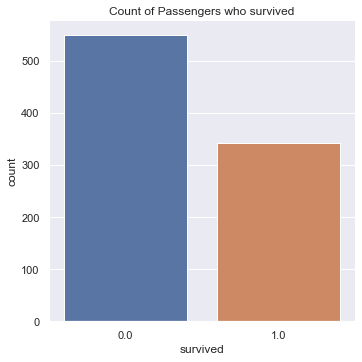

In [107]:
sns.factorplot('survived', data=titanic, kind='count')
plt.title('Count of Passengers who survived');

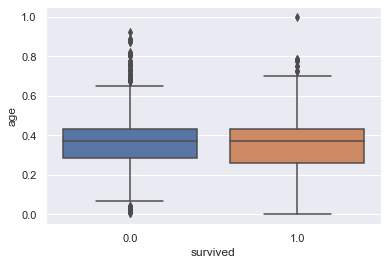

In [108]:
sns.boxplot(x='survived',y='age',data=titanic)

### Distribution os survivers

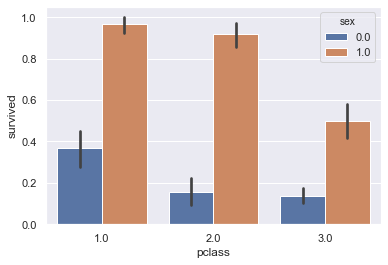

In [109]:
sns.barplot(x='pclass',y='survived',hue='sex',data=titanic);

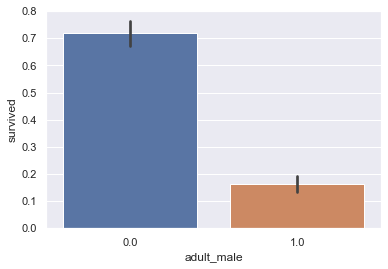

In [110]:
sns.barplot(x='adult_male',y='survived',data=titanic);

## Correlation

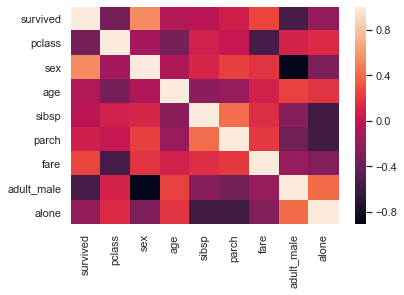

In [111]:
sns.heatmap(titanic.corr());

# Machine learning

In [129]:
class logistic_regression:
    
    def __init__(self,N,p,tol,treshold,verbose=False):
        self.N = N  #number of iterations (Hyperparameter)
        self.p = p #alpha(Hyperparameter) 
        self.tol = tol
        self.treshold = treshold
        self.precision = abs(math.floor(math.log(self.treshold, 10)))
        self.verbose = verbose
        
    def sigmoid(self,a):
        return(1/(1+np.exp(-a)))    #sigmoid (Link Fucntion)
    
    def a(self,x,w):
        a = w[0]
        a += np.dot(w[1:],x)
        
        return a
        
    def cost(self,y,y_pred):
        n = len(y)
        cost = float(-1/n)*(np.dot(y,np.log(y_pred))+np.dot((1-y),np.log(1-y_pred)))
        return round(cost,self.precision)
                       
    def fit(self,x,y): #(X-data for training, y - Output)
        x = np.array(x).astype(float)
        y = np.array(y).astype(float)
        n=x.shape[0] #number of samples of x and y
        m=x.shape[1] #number of parameters (columns) of x
        self.w=np.ones(m+1)/10  #Initializing the weights vector
        count = 0
        dw = np.ones(m+1)
        cost = 1
        while count < self.N and cost > self.tol:
            y_pred = np.zeros(n)
            for i in range(n):
                x_row = x[i]
                a = self.a(x_row,self.w)
                y_pred[i] = self.sigmoid(a)
                dw[1:] = (y_pred[i]-y[i])*x_row
                dw[0] = y_pred[i]-y[i]
                self.w = self.w - self.p*dw
                
            cost = self.cost(y,y_pred)
            if self.verbose:
                print(f'cost={cost}')
            count += 1
            
    def predict(self,x):
        x = np.array(x)
        aux = self.w[0]*np.ones(len(x))
        y_pred = np.dot(x,self.w[1:])
        y_pred+=aux
        
        def convert(x):
            if x >= self.treshold:
                return 1.
            else:
                return .0
            
        y_pred = list(map(convert,y_pred))
        
        return y_pred
    
    def stats(self,y,y_pred):
        tp = tn = fp = fn = 0.
        y = np.array(y).astype(int)
        y_pred = np.array(y_pred).astype(int)
        
        for i in range(len(y)):
            if y[i] == 1. and y_pred[i] == 1.:
                tp+=1
            elif y[i] == 0. and y_pred[i] == 0.:
                tn+=1
            elif y[i] == 1. and y_pred[i] == 0.:
                fn+=1
            else:
                fp+=1
        
        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        f1 = 2*(precision*recall)/(precision+recall)
        return precision,recall,f1


precision = 0.9230769230769231 recall = 0.46601941747572817 f1 = 0.6193548387096774
precision = 0.7263157894736842 recall = 0.6699029126213593 f1 = 0.6969696969696969
precision = 0.8333333333333334 recall = 0.6310679611650486 f1 = 0.718232044198895
precision = 0.9215686274509803 recall = 0.4563106796116505 f1 = 0.6103896103896104
precision = 0.7951807228915663 recall = 0.6407766990291263 f1 = 0.7096774193548387
precision = 0.8813559322033898 recall = 0.5048543689320388 f1 = 0.6419753086419752
precision = 0.8676470588235294 recall = 0.5728155339805825 f1 = 0.6900584795321637
precision = 0.9607843137254902 recall = 0.47572815533980584 f1 = 0.6363636363636364
precision = 0.7790697674418605 recall = 0.6504854368932039 f1 = 0.708994708994709
precision = 0.9285714285714286 recall = 0.5048543689320388 f1 = 0.6540880503144654
avg precision = 0.8616903896992186 avg recall = 0.5572815533980584 avg f1 = 0.6686103793469668


## Split data in multiple batches of `train` and `test`. Y(target parameter) is `survived`
## This is called cross-fold validation

In [130]:
n_splits = 10
test_size = 0.3

sss = StratifiedShuffleSplit(n_splits=n_splits, 
                             test_size=test_size, 
                             random_state=42)
X = titanic.drop(['survived'],axis=1)
y = titanic['survived']

lr = logistic_regression(50,.1,1e-7,.5)
precisions = []
recalls = []
f1s = []

for train_index, test_index in sss.split(X, y):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]

    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]

    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    precision,recall,f1 = lr.stats(y_test,y_pred)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    print(f'precision = {precision} recall = {recall} f1 = {f1}')

precision = sum(precisions)/len(precisions)
recall = sum(recalls)/len(recalls)
f1 = sum(f1s)/len(f1s)

print(f'avg precision = {precision} avg recall = {recall} avg f1 = {f1}')

precision = 0.9230769230769231 recall = 0.46601941747572817 f1 = 0.6193548387096774
precision = 0.7263157894736842 recall = 0.6699029126213593 f1 = 0.6969696969696969
precision = 0.8333333333333334 recall = 0.6310679611650486 f1 = 0.718232044198895
precision = 0.9215686274509803 recall = 0.4563106796116505 f1 = 0.6103896103896104
precision = 0.7951807228915663 recall = 0.6407766990291263 f1 = 0.7096774193548387
precision = 0.8813559322033898 recall = 0.5048543689320388 f1 = 0.6419753086419752
precision = 0.8676470588235294 recall = 0.5728155339805825 f1 = 0.6900584795321637
precision = 0.9607843137254902 recall = 0.47572815533980584 f1 = 0.6363636363636364
precision = 0.7790697674418605 recall = 0.6504854368932039 f1 = 0.708994708994709
precision = 0.9285714285714286 recall = 0.5048543689320388 f1 = 0.6540880503144654
avg precision = 0.8616903896992186 avg recall = 0.5572815533980584 avg f1 = 0.6686103793469668
